In [25]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [26]:
dir_name = "dataset/faces/"
y = []
X = []
target_names = []
person_id = 0
h = w = 100
n_samples = 0
class_names = []
for person_name in os.listdir(dir_name):
    dir_path = dir_name + person_name + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        img = cv2.imread(image_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples = n_samples + 1
        y.append(person_id)
        target_names.append(person_name)
    person_id = person_id + 1
y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 10000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 10000
n_classes: 450


Extracting the top 40 eigenfaces from 337 faces


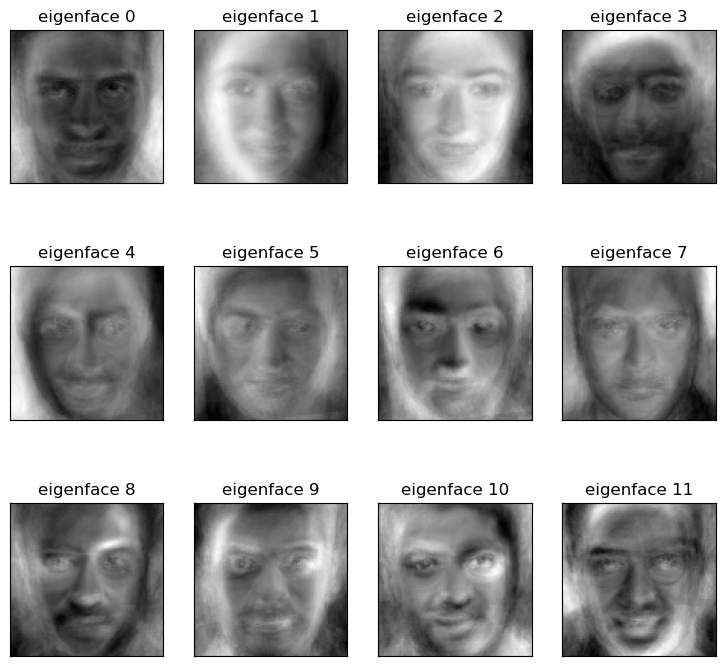

Projecting the input data on the eigenfaces orthonormal basis
(337, 40) (113, 40)
Project done...


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
n_components = 40
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(
    n_components=n_components,
    svd_solver='randomized',
    whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("Project done...")

In [28]:
# Training with Multi Layer Perceptron
clf = MLPClassifier(
    random_state=1,
    hidden_layer_sizes=(10, 10),
    max_iter=1000,
    verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.76590471
Iteration 2, loss = 2.73827611
Iteration 3, loss = 2.71201009
Iteration 4, loss = 2.68607566
Iteration 5, loss = 2.66129763
Iteration 6, loss = 2.63781203
Iteration 7, loss = 2.61485581
Iteration 8, loss = 2.59178716
Iteration 9, loss = 2.57048021
Iteration 10, loss = 2.54925535
Iteration 11, loss = 2.52862281
Iteration 12, loss = 2.50924897
Iteration 13, loss = 2.49041791
Iteration 14, loss = 2.47175580
Iteration 15, loss = 2.45346605
Iteration 16, loss = 2.43588760
Iteration 17, loss = 2.41898395
Iteration 18, loss = 2.40211462
Iteration 19, loss = 2.38614647
Iteration 20, loss = 2.37036159
Iteration 21, loss = 2.35559956
Iteration 22, loss = 2.34076226
Iteration 23, loss = 2.32706896
Iteration 24, loss = 2.31334221
Iteration 25, loss = 2.29959288
Iteration 26, loss = 2.28697333
Iteration 27, loss = 2.27354027
Iteration 28, loss = 2.26160302
Iteration 29, loss = 2.24914994
Iteration 30, loss = 2.23744722
Iteration 31, loss = 2.22606250
Iteration 32, los

C:\Users\saipa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 59.29203539823009


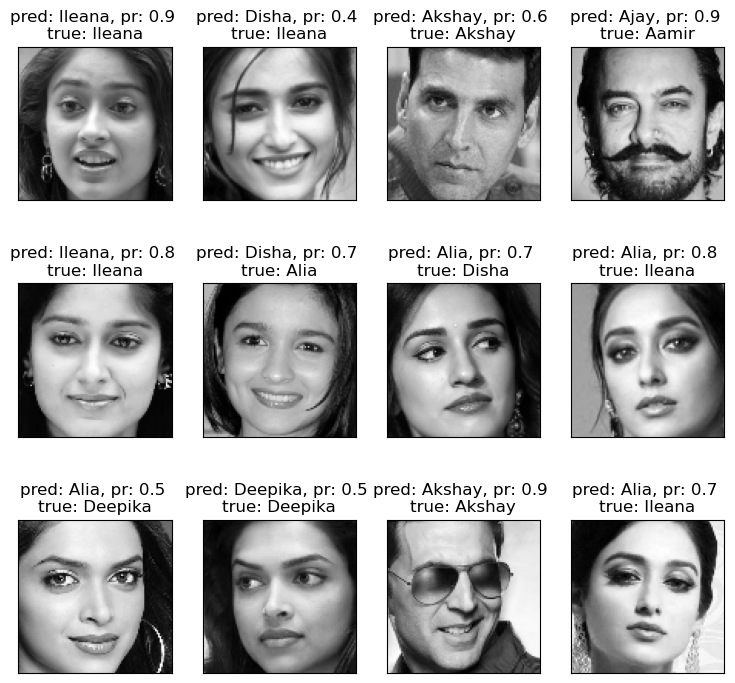

In [29]:
y_pred = []
y_prob = []
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (
        pred_name,
        str(y_prob[i])[0:3],
        true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
       true_positive = true_positive + 1
print("Accuracy:", true_positive * 100 / y_pred.shape[0])
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [30]:
import pickle

pickle.dump(pca, open("pca.pkl", "wb"))
pickle.dump(lda, open("lda.pkl", "wb"))
pickle.dump(clf, open("ann_model.pkl", "wb"))
pickle.dump(class_names, open("class_names.pkl", "wb"))
